In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [32]:
FOLDER = "pokemons/" # folder to save the pokemons
TOTAL_POKEMONS = 1025 # total number of pokemons

In [3]:
def load_pkm_json(json_file_path):
    with open(json_file_path) as f:
        data = json.load(f)
    return data

In [57]:
def get_pkm_data(pkm):
    data = {}
    data["id"] = pkm["id"]
    data["name"] = pkm["name"]
    data["base_experience"] = pkm["base_experience"]
    data["height"] = pkm["height"] / 10 # in meters
    data["weight"] = pkm["weight"] / 10 # in kg
    data["imc"] = data["weight"] / (data["height"] ** 2)
    data["types"] = [t["type"]["name"] for t in pkm["types"]]
    return data

In [43]:
def load_pkm(pkm_id):
    pkm = load_pkm_json(FOLDER + str(pkm_id) + ".json")
    return get_pkm_data(pkm)

In [44]:
def load_pkms():
    pkms = []
    for i in range(1, TOTAL_POKEMONS + 1):
        try:
            pkm = load_pkm(i)
            pkms.append(pkm)
        except:
            pass
    return pd.DataFrame(pkms)

In [58]:
df_pkms = load_pkms()
df_pkms.head()

,id,name,base_experience,height,weight,imc,types
0,1,bulbasaur,64.0,0.7,6.9,14.081633,"[grass, poison]"
1,2,ivysaur,142.0,1.0,13.0,13.000000,"[grass, poison]"
2,3,venusaur,263.0,2.0,100.0,25.000000,"[grass, poison]"
3,4,charmander,62.0,0.6,8.5,23.611111,[fire]
4,5,charmeleon,142.0,1.1,19.0,15.702479,[fire]


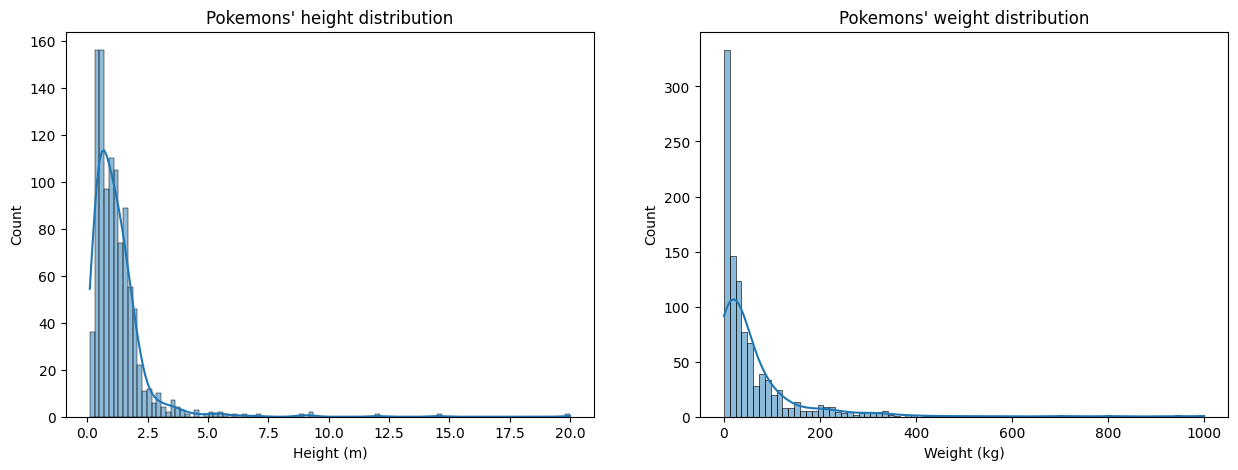

In [56]:
# Let's see the distribution of the pokemons' height and weight
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df_pkms["height"], kde=True, ax=ax[0])
ax[0].set_title("Pokemons' height distribution")
ax[0].set_xlabel("Height (m)")
sns.histplot(df_pkms["weight"], kde=True, ax=ax[1])
ax[1].set_title("Pokemons' weight distribution")
ax[1].set_xlabel("Weight (kg)")
plt.show()

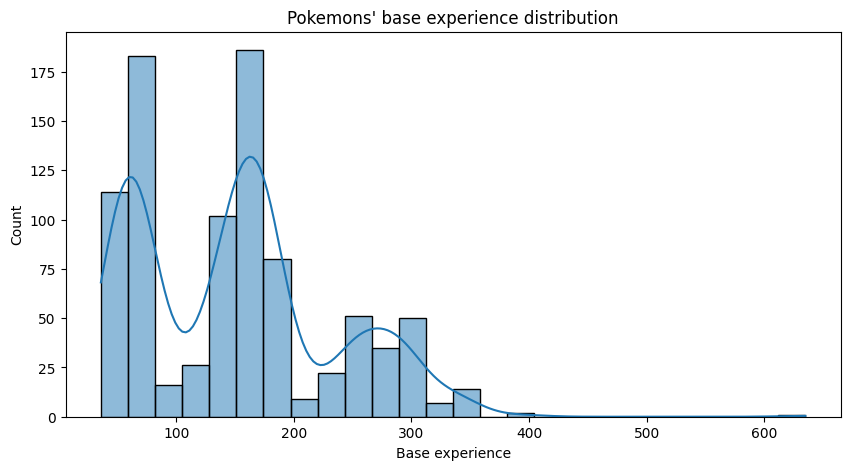

In [60]:
# Let's see the distribution of the pokemons' base experience
plt.figure(figsize=(10, 5))
sns.histplot(df_pkms["base_experience"], kde=True)
plt.title("Pokemons' base experience distribution")
plt.xlabel("Base experience")
plt.show()